In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import branca.colormap as cm
%matplotlib inline

In [8]:
# folium map functions to create and fill the map
def create_colormap():
    colormap = cm.LinearColormap(colors=['darkblue','blue','cyan','yellow','orange','red','crimson'],
                                    index=[-1,0,1,2,3,4,5],
                                    caption='Scale (F)',
                                    vmin=-1,
                                    vmax=5)
    return colormap

def add_to_fol_map(m,circ_color,row):
    folium.Circle(
    location=[row['Latitude'],row['Longitude']],
    popup=row['Date'],
    radius=50,
    color= circ_color,
    fill=True,
    fill_color=circ_color).add_to(m)
    return m

def pick_color(value):
    if value == -1:
        return 'darkblue'
    elif value == 0:
        return 'blue'
    elif value == 1:
        return 'cyan'
    elif value == 2:
        return 'yellow'
    elif value == 3:
        return 'orange'
    elif value == 4:
        return 'red'
    elif value == 5:
        return 'crimson'

def create_map(df):
    m = folium.Map(location=[0,0], zoom_start=2)
    df_len = len(df)
    for i in range(0,df_len):
        color = pick_color(df['Scale'][i])
        m = add_to_fol_map(m,color,df.iloc[i])
    m.add_child(create_colormap())
    m.save('map.html')

In [21]:
def save_countplot_scale(df):
    sns.set_theme(style='whitegrid')
    ax = sns.countplot(x='Scale', data=df, palette='flare')
    ax.set_xlabel('Scale')
    ax.set_ylabel('Tornadoes Count')
    plt.title('Distribution of Scale')
    plt.savefig('countplot_scale.png')


In [22]:
def pie_chart_scales(df):
    df_scale_low = df[(df['Scale'] == 0) | (df['Scale'] == 1)].reset_index(drop=True)
    df_scale_medium = df[(df['Scale'] == 2) | (df['Scale'] == 3)].reset_index(drop=True)
    df_scale_high = df[(df['Scale'] == 4) | (df['Scale'] == 5)].reset_index(drop=True)
    df_scale_undef = df[(df['Scale'] == -1)].reset_index(drop=True)
    precentage_scale_low = len(df_scale_low)/len(df)
    precentage_scale_medium = len(df_scale_medium)/len(df)
    precentage_scale_high = len(df_scale_high)/len(df)
    precentage_scale_undef = len(df_scale_undef)/len(df)
    labels = ['Low(0-1)','Medium(2-3)','High(4-5)', 'Undefined(-1)']
    explode = (0.1,0.1,0.1,0.1)
    plt.pie([precentage_scale_low,precentage_scale_medium,precentage_scale_high,precentage_scale_undef], labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)
    plt.title('Scale Percentage')
    plt.savefig('pie_scale.png')


In [23]:
def line_plot(df):
    sns.set_theme(style='whitegrid')
    sns.lmplot(data=df,x='Year',y='Scale',lowess=True,scatter_kws={'alpha':0.01,'s':5,'color':'blue'},line_kws={'color':'red'})
    plt.title('Scale by Year')
    plt.savefig('line_plot.png')

In [24]:
# Calculate number of tornadoes per state and plot
def plot_deaths_by_country(df):
    countries = df.Country.value_counts(ascending=True)
    fig, ax = plt.subplots(figsize=(7, 30))
    countries.plot(kind='barh')
    plt.title(f'Deaths by Country (1990 - 2021)')
    plt.ylabel('Country')
    plt.xlabel('Deaths')
    plt.savefig(f'plot_deaths_by_country.png')

In [25]:
# Calculate number of tornadoes per state and plot
def plot_deaths_by_scale(df):
    scales = df.groupby('Scale')['Deaths'].sum()
    fig, ax = plt.subplots(figsize=(7, 10))
    scales.plot(kind='barh')
    plt.title(f'Deaths by Scale (1990 - 2021)')
    plt.ylabel('Scale')
    plt.xlabel('Deaths')
    plt.savefig(f'plot_deaths_by_Scale.png')

In [10]:
def plot_3d_deaths_by_lat_lon(df):
    ax = plt.axes(projection='3d')
    xdata = df['Latitude']
    ydata = df['Longitude']
    zdata = df['Scale']
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Longitude')
    ax.set_zlabel('Scale')
    ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap = 'rainbow')
    plt.title('3D Plot of Deaths by Latitude and Longitude')
    plt.savefig('3d_plot_deaths_by_lat_lon.png')

In [27]:
def plot_tornadoes_by_year(df):
    new_df = df.Year.value_counts()
    new_df.plot(kind='bar',figsize=(10,5), color='#7eb54e')
    xlabel = 'Year'
    ylabel = 'Number of Tornadoes'
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title('Tornadoes per Year')
    plt.savefig('tornadoes_per_year.png')

In [28]:
def line_plot_deaths_by_year(df):
    newdf = df.groupby('Year')['Deaths'].sum()
    newdf.plot(kind='line',figsize=(10,5), color='red')
    plt.title('Deaths per year')
    plt.savefig('deaths_per_year.png')

In [73]:
def tornadoes_per_month(df):    
    df_months = df.copy()
    df_months['Date'] = pd.to_datetime(df_months['Date'])
    df_months['Month'] = df_months['Date'].dt.month
    df_months['Month'] = df_months.Month.astype(float)
    df_tor_per_month = df_months.Month.value_counts().sort_index()
    df_tor_per_month.plot(kind='bar',figsize=(10,5), color='lightblue')
    plt.title('Tornadoes per Month')
    plt.xlabel('Month')
    plt.ylabel('Number of Tornadoes')
    plt.savefig('tornadoes_per_month.png')

In [60]:
def mean_len_wid_by_scale(df, col):
    df_scale= df.groupby('Scale')[col].mean()
    color_list = ['#ff0000','#ff7f00','#ffff00','#00ff00','#00ffff','#0000ff','#7f00ff','#ff00ff']
    plt.xlabel('Scale')
    plt.ylabel(col)
    df_scale.plot(kind='bar',figsize=(10,5), color=color_list)
    plt.title(f'Scale by {col}')
    plt.savefig(f'bar_plot_scale_by_{col}.png')    

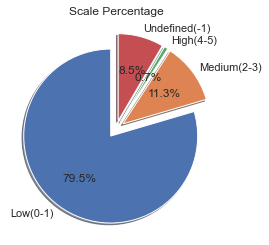

In [29]:
df = pd.read_csv('cleaned_data.csv')
pie_chart_scales(df)

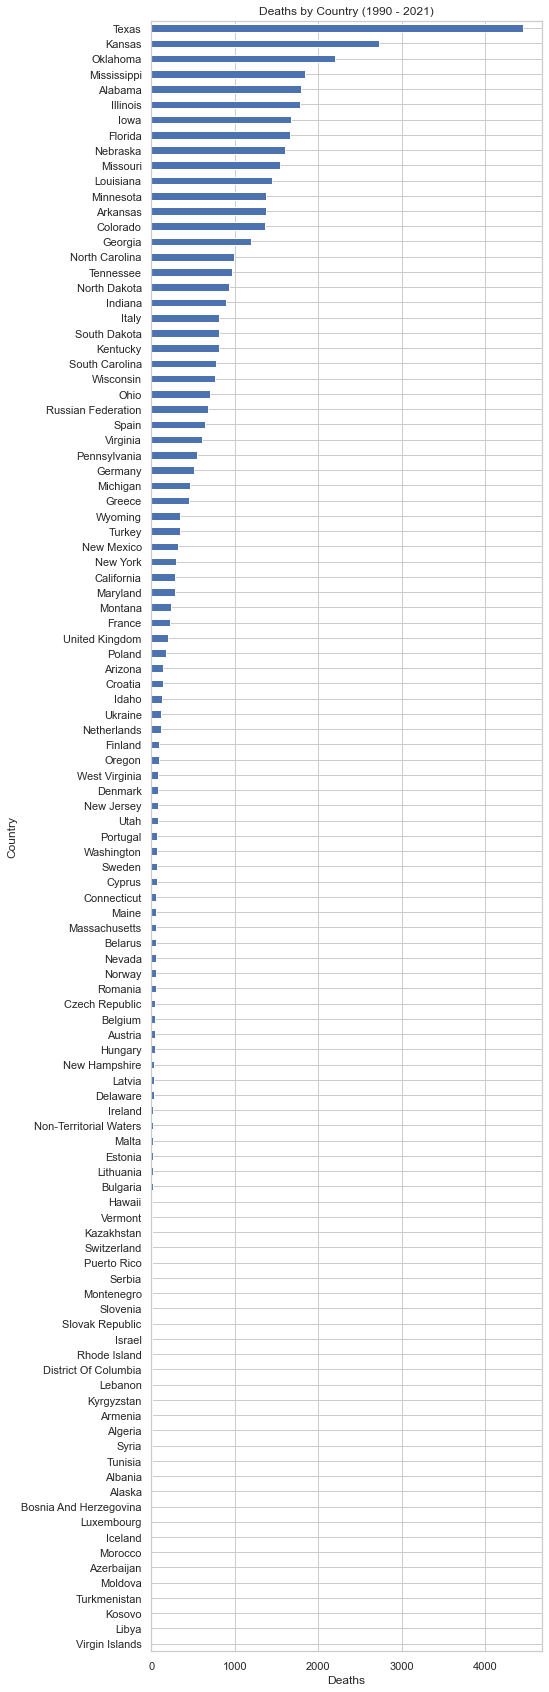

In [36]:
plot_deaths_by_country(df)

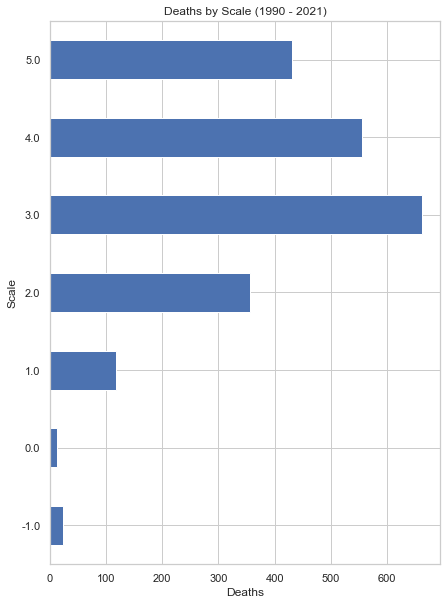

In [31]:
plot_deaths_by_scale(df)

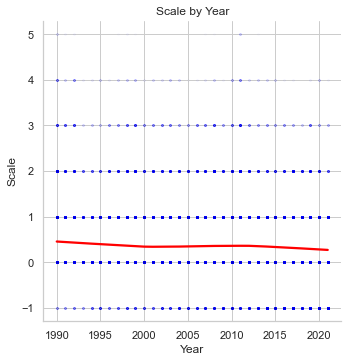

In [32]:
line_plot(df)

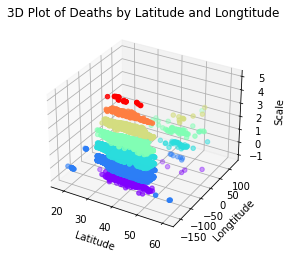

In [11]:
plot_3d_deaths_by_lat_lon(df)

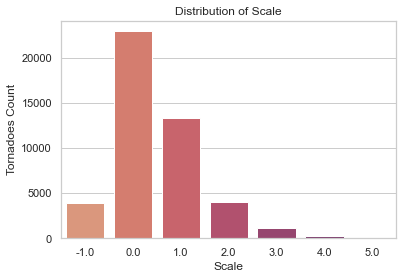

In [34]:
save_countplot_scale(df)

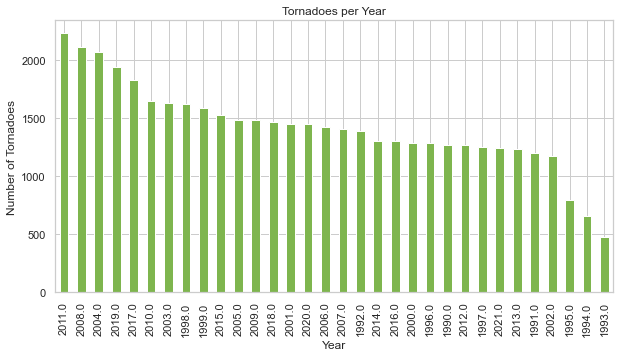

In [35]:
plot_tornadoes_by_year(df)

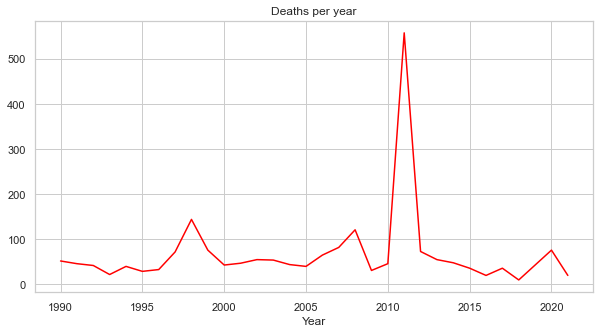

In [75]:
line_plot_deaths_by_year(df)

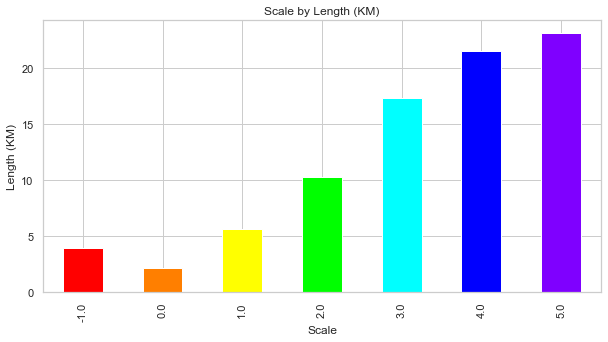

In [80]:
mean_len_wid_by_scale(df, 'Length (KM)')

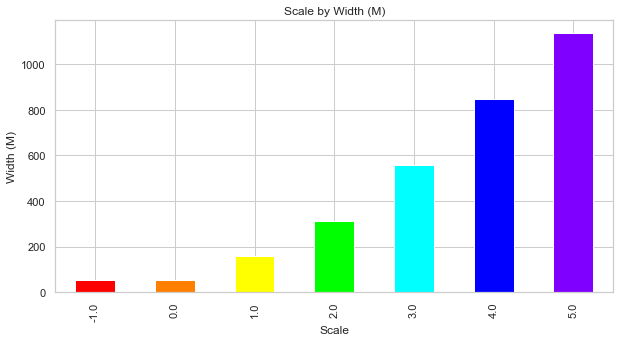

In [81]:
mean_len_wid_by_scale(df, 'Width (M)')

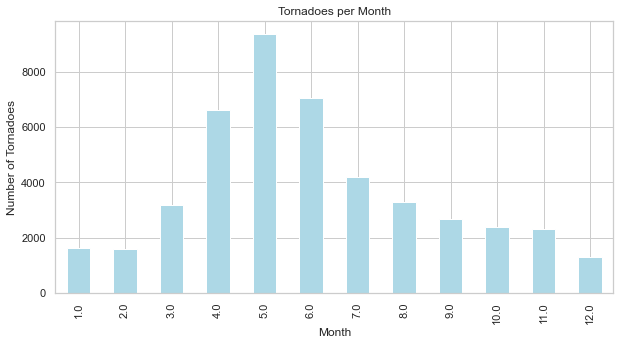

In [74]:
tornadoes_per_month(df)

In [9]:
create_map(df)